In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

In [161]:
mu = 100
background = stats.poisson.rvs(mu, loc=0, size=100000)

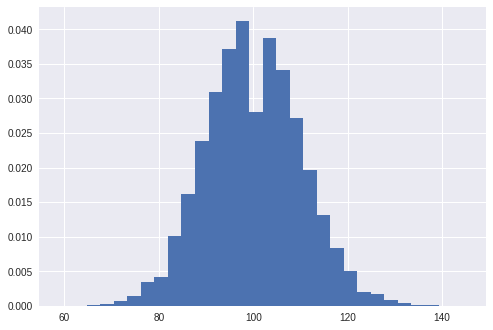

In [3]:
fig, ax = plt.subplots(1,1)
ax.hist(background, bins=30, density=True)
plt.show()

### Problem 1

The first problem is to look at your background distribution and determine where the 5σ sensitivity threshold is.

In [4]:
prob5sigma = stats.norm.cdf(5, loc=0, scale=1)
threshold_value = stats.poisson.ppf(prob5sigma, mu, loc=0)

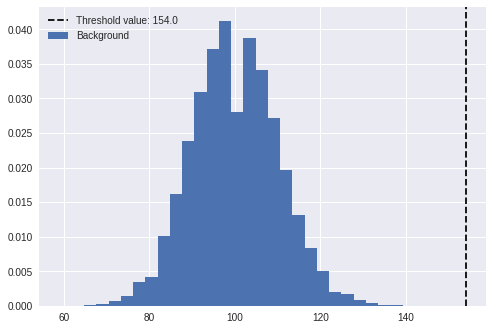

In [5]:
fig, ax = plt.subplots(1,1)
ax.hist(background, bins=30, density=True, label='Background')
plt.axvline(threshold_value, color='k', linestyle='--', label="Threshold value: "+str(threshold_value))
ax.legend(loc=0)
plt.show()

### Problem 2

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30σ range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

In [174]:
signal = 15 # signal
prob_signal = stats.norm.cdf(8, loc=0, scale=1)
val_signal = stats.poisson.ppf(prob_signal, mu)

In [175]:
inject = np.zeros(100000)
for i in range(5000):
    inject[(np.random.randint(0, 100000))] = val_signal

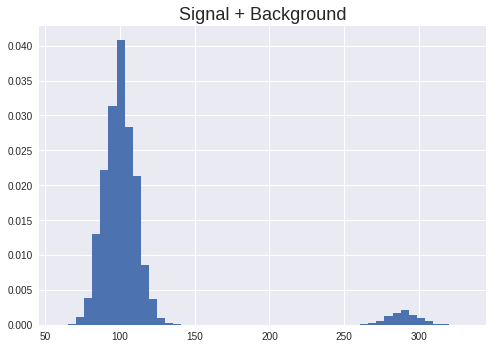

In [179]:
data = background + inject

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=50, density=True)
plt.title("Signal + Background", fontsize=18)
plt.show()

**b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?**

Yes the observed signal is biased.

### Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5σ (30σ or more). You will want to follow the work you did for Homework 5 very closely.

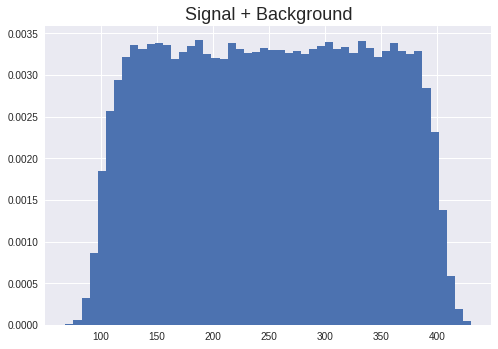

In [65]:
signal_strength = 302
signal_inject = stats.uniform.rvs(loc=0, scale=signal_strength, size=100000)

data = signal_inject + background

fig, ax = plt.subplots(1,1)
ax.hist(data, bins=50, density=True)
plt.title("Signal + Background", fontsize=18)
plt.show()

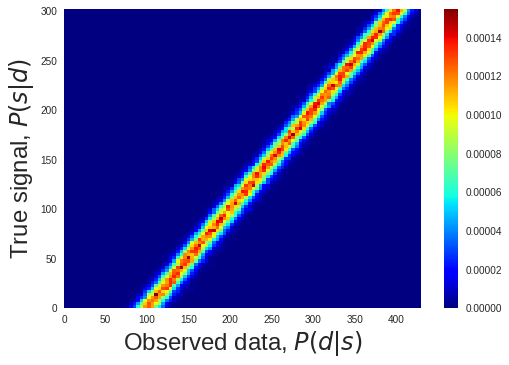

In [78]:
array_size = 100
signaledges = np.linspace(0,signal_strength, array_size)
dataedges = np.linspace(0, round(np.sort(data)[-1]), array_size)

Psd, temp, temp2 = np.histogram2d(data, signal_inject, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters,signalcenters,Psd.T, cmap=plt.cm.jet, shading='auto')
plt.colorbar()
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.show()

b) For the same injected signal power as in problem 2, show that you get the same answer.

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5σ) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

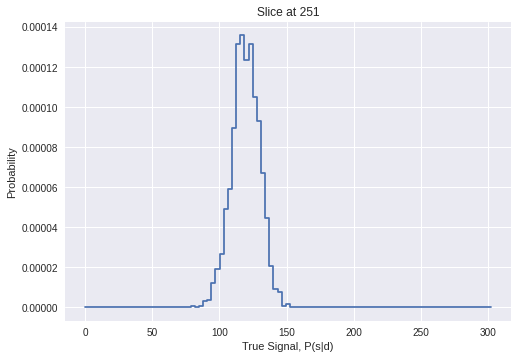

In [181]:
fig, ax = plt.subplots(1,1)

index = 50
no_bins = array_size / signal_strength
val = index/no_bins + 100

x = np.linspace(signaledges[0], signaledges[-1], len(Psd[index]))
plt.step(x, Psd[index], where='mid')
plt.xlabel("True Signal, P(s|d)")
plt.ylabel("Probability")
plt.title("Slice at "+str(round(val)))
plt.show()

In [70]:
bin / signal_strength

0.33112582781456956

In [80]:
no_bins = array_size / signal_strength
no_bins

0.33112582781456956